# Packages

In [1]:
# Install required packages

!pip install dmba
!pip install graphviz

# Import required modules

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Importing data

In [2]:
# Create the data frame

Heart_df = pd.read_csv('HeartStats.csv')
Heart_df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
# Data frame dimensions

print('Number of rows and columns in the data set:', Heart_df.shape)

Number of rows and columns in the data set: (1190, 12)


In [4]:
# Check for missing values

Heart_df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [5]:
# Display modified column names

print('Modified column titles with no space and one word for titles:')
Heart_df.columns = [s.strip().replace(' ', '_') for s in Heart_df.columns]
Heart_df.columns

Modified column titles with no space and one word for titles:


Index(['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', 'target'],
      dtype='object')

In [6]:
# Display column data types

Heart_df.dtypes

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
ST_slope                 int64
target                   int64
dtype: object

In [7]:
# Convert 'oldpeak' variable data type to integer

Heart_df['oldpeak'] = Heart_df['oldpeak'].astype(int)

In [8]:
# Display converted data types

Heart_df.dtypes

age                    int64
sex                    int64
chest_pain_type        int64
resting_bp_s           int64
cholesterol            int64
fasting_blood_sugar    int64
resting_ecg            int64
max_heart_rate         int64
exercise_angina        int64
oldpeak                int32
ST_slope               int64
target                 int64
dtype: object

# Exploratory Data Analysis

In [9]:
# Descriptive statistics for all columns

np.round(Heart_df.describe(), decimals=2)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00
mean,53.72,0.76,3.23,132.15,210.36,0.21,0.70,139.73,0.39,0.73,1.62,0.53
std,9.36,0.42,0.94,18.37,101.42,0.41,0.87,25.52,0.49,1.00,0.61,0.50
min,28.00,0.00,1.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.00,0.00,0.00
25%,47.00,1.00,3.00,120.00,188.00,0.00,0.00,121.00,0.00,0.00,1.00,0.00
50%,54.00,1.00,4.00,130.00,229.00,0.00,0.00,140.50,0.00,0.00,2.00,1.00
75%,60.00,1.00,4.00,140.00,269.75,0.00,2.00,160.00,1.00,1.00,2.00,1.00
max,77.00,1.00,4.00,200.00,603.00,1.00,2.00,202.00,1.00,6.00,3.00,1.00


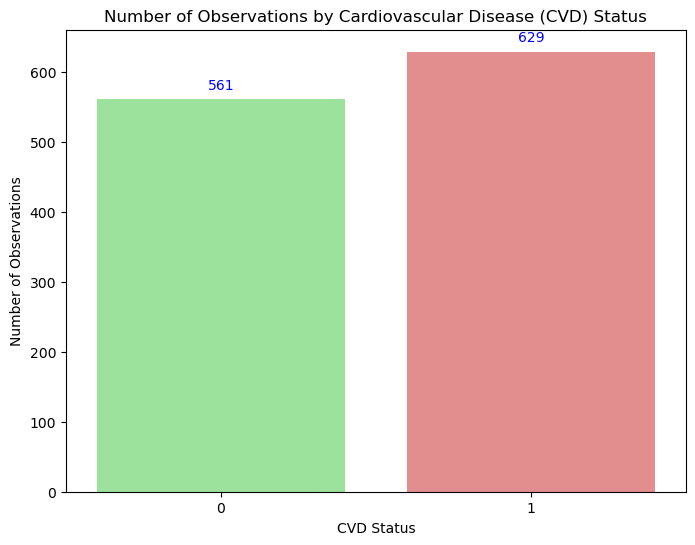

In [10]:
# Set custom colors for the countplot

colors = ['lightgreen', 'lightcoral']

# Plot distribution of the output variable

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='target', data=Heart_df, palette=colors)

# Add data labels to the bars

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points', color='blue')
plt.title('Number of Observations by Cardiovascular Disease (CVD) Status')
plt.xlabel('CVD Status')
plt.ylabel('Number of Observations')
plt.show()

# Classification Tree Model

In [11]:
# Develop predictors X and output variable Y for the data set

X = Heart_df.drop(columns=['target'])
y = Heart_df['target']

# Develop training (80%) and validation (20%) partitions for the data frame

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state=1)

In [12]:
# Start with initial guess for parameters

param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Apply GridSearchCV() fucntion for various combinations of DecisionTreeClassifier() initial parameters

gridSearch_init = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree

print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print()
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8204

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.005, 'min_samples_split': 60}


In [13]:
# Improve grid search parameters by adapting grid based on results from initial grid search parameters

param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of DecisionTreeClassifier() improved parameters

gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree 

print(f'Improved score:{gridSearch.best_score_:.4f}')
print()
print('Improved parameters: ', gridSearch.best_params_)

Improved score:0.8235

Improved parameters:  {'max_depth': 16, 'min_impurity_decrease': 0.001, 'min_samples_split': 10}


Best Classification Tree with Grid Search


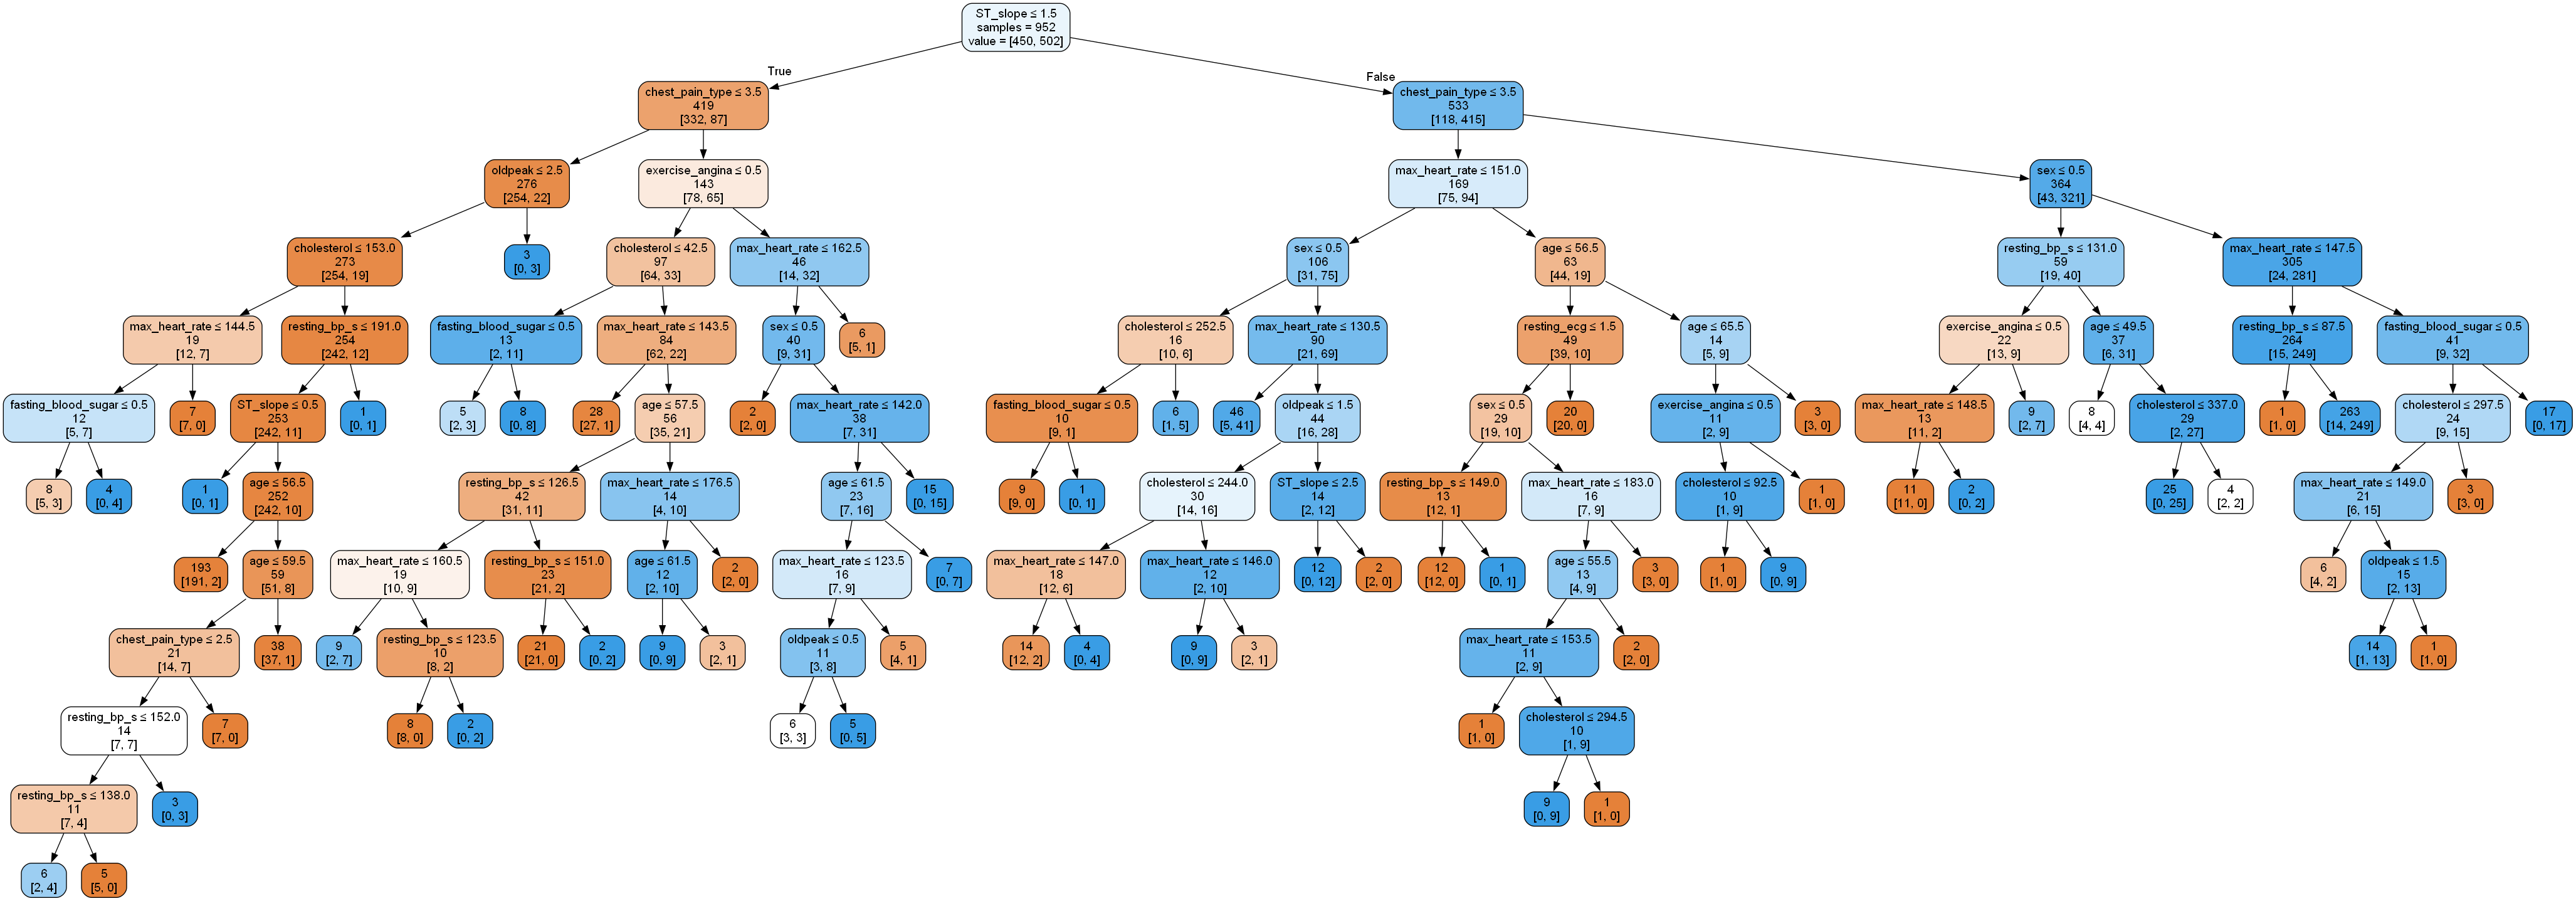

In [14]:
# Create classification tree based on the improved parameters

bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters

print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [15]:
# Indetify and display number of nodes in the tree based on grid search

tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 129


In [16]:
# Confusion matrices for grid search classification tree

# Identify and display confusion matrix for training partition

print('Training Partition')
print()
classificationSummary(train_y, bestClassTree.predict(train_X))
print('_____________________________________________________________')

# Identify and display confusion matrix for validation partition

print()
print('Validation Partition')
print()
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition

Confusion Matrix (Accuracy 0.9443)

       Prediction
Actual   0   1
     0 421  29
     1  24 478
_____________________________________________________________

Validation Partition

Confusion Matrix (Accuracy 0.8824)

       Prediction
Actual   0   1
     0 103   8
     1  20 107


In [17]:
# Make classification for new heart statistics data using smaller classfication tree model

# Develop data frame with 2 new records without 'target' outcome variable
 
new_data_small = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],
})

# Make classifications for new data

pred_small_tree = bestClassTree.predict(new_data_small)

# Make classifications for new data from patients

pred_small_result = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],
            'Classification': pred_small_tree,
})

print()
print('Classification for target (CVD Status)')
print(pred_small_result)


Classification for target (CVD Status)
   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   45    0                3           110          280                    0   
1   35    1                4           135          190                    1   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  \
0            1             160                0        1         1   
1            0             115                1        0         2   

   Classification  
0               0  
1               1  


# Logistic Regression Model

In [18]:
# Develop predictors X and output variable Y for the data set

X = Heart_df.drop(columns=['target'])
y = Heart_df['target']

# Develop training (80%) and validation (20%) partitions for the data frame

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state=1)

In [19]:
# Develop and display nominal logistic model for heart statistics data set

# Utilize LogisticRegression() function to develop nominal logistic regression

logit_nom = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=3000, C=1e24, multi_class='multinomial')
logit_nom.fit(train_X, train_y)

# Display intercept (logit_nom.interpcept_) and coefficients of the nominal logistic regression (logit_nom.coef_) 

print()
print('Nominal Logistic Regression')
print('  Intercepts', np.round(logit_nom.intercept_, decimals=3))
print('  Coefficients', np.round(logit_nom.coef_, decimals=3))
print()

# Classify nominal logistic outcomes results_nom and probabilities prob_nom for validation partition

results_nom = logit_nom.predict(valid_X)
prob_nom = np.round(logit_nom.predict_proba(valid_X), decimals = 4)

# Create data frame to show nominal logistic model resuts for heart statistics data set

print()
print('Classification for First 10 Records in Validation Data Set')
results_nom = pd.DataFrame({
    'Actual': valid_y, 'Classification': results_nom,
    'P(0)': [p[0] for p in prob_nom],
    'P(1)': [p[1] for p in prob_nom],
})

# Display 10 top records with actual classes and classification results, and respective probabilities
print(results_nom.head(10))


Nominal Logistic Regression
  Intercepts [-3.199]
  Coefficients [[ 0.011  0.696  0.363  0.005 -0.001  0.273  0.056 -0.006  0.471  0.214
   0.64 ]]


Classification for First 10 Records in Validation Data Set
      Actual  Classification    P(0)    P(1)
49         1               0  0.5917  0.4083
382        1               1  0.1011  0.8989
304        1               1  0.0314  0.9686
1010       1               1  0.0041  0.9959
798        1               1  0.4221  0.5779
1012       0               0  0.9318  0.0682
310        1               1  0.0936  0.9064
390        1               1  0.0620  0.9380
678        1               1  0.4218  0.5782
274        0               0  0.7570  0.2430


In [20]:
# Confusion matrices for logistic regression

# Identify and display confusion matrix for training partition

print('Training Partition')
print()
classificationSummary(train_y, logit_nom.predict(train_X))
print('_____________________________________________________________')

# Identify and display confusion matrix for validation partition

print()
print('Validation Partition')
print()
classificationSummary(valid_y, logit_nom.predict(valid_X))

Training Partition

Confusion Matrix (Accuracy 0.8298)

       Prediction
Actual   0   1
     0 370  80
     1  82 420
_____________________________________________________________

Validation Partition

Confusion Matrix (Accuracy 0.8529)

       Prediction
Actual   0   1
     0  96  15
     1  20 107


In [21]:
# Make classification for new heart statistics data using multiple predictor logistic regression model

# Develop data frame with 2 new records without 'target' outcome variable

new_data = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2], 
})

# Make classifications for new data

pred_new_data = logit_nom.predict(new_data)

# Predictions with probabilities p(0) and p(1)

pred_new_prob = np.round(logit_nom.predict_proba(new_data), decimals = 4)

# Make classifications for new data from patients

pred_new_result = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2], 
            'p(0)': [p[0] for p in pred_new_prob],
            'p(1)': [p[1] for p in pred_new_prob],
            'Classification': pred_new_data,
})

print()
print('Classification for target (CVD Status)')
print(pred_new_result)


Classification for target (CVD Status)
   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   45    0                3           110          280                    0   
1   35    1                4           135          190                    1   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope    p(0)  \
0            1             160                0        1         1  0.9525   
1            0             115                1        0         2  0.1028   

     p(1)  Classification  
0  0.0475               0  
1  0.8972               1  


# Neural Network Model

In [22]:
# Develop predictors X and output variable Y for the data set

X = Heart_df.drop(columns=['target'])
y = Heart_df['target']

# Develop training (80%) and validation (20%) partitions for the data frame

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.2, random_state=1)

In [23]:
# Identify grid search parameters

param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number of nodes in the hidden layer

gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=12000, random_state=1), param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value

print(f'Best score:{gridSearch.best_score_:.4f}')
print()
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8225

Best parameter:  {'hidden_layer_sizes': 16}


In [24]:
# Use MLPCclassifier() function to train the improved neural network model based on grid search results
 
Heart_clf_imp = MLPClassifier(hidden_layer_sizes=(16), max_iter=12000, activation='logistic', solver='lbfgs', random_state=1)
Heart_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of intercepts (Theta) and weights (W)

print('Final Intercepts for Network Model')
print(Heart_clf_imp.intercepts_)

print()
print('Network Weights for Network Model')
print(Heart_clf_imp.coefs_)

Final Intercepts for Network Model
[array([ 1.00634219e-01, -1.37533664e-01, -2.36057414e-01, -7.06067967e-02,
        7.22213389e-02, -1.60551445e-01,  1.38665970e-01, -2.35947654e-01,
       -1.30450703e-01, -5.90572519e+01, -1.66860215e-01,  7.12547155e-02,
       -5.01626484e+00, -1.39854104e+02, -1.27342325e-01, -2.35944410e-01]), array([6.90186987])]

Network Weights for Network Model
[array([[ 1.04644705e-02, -2.78467978e-01, -2.45793532e-01,
        -9.07699344e-02,  2.33094795e-02, -3.54018454e-01,
        -9.61706733e-02, -7.59377558e-02, -4.97808233e-02,
        -4.03519058e+00, -3.89908324e-02, -2.72551296e-01,
         2.06615898e+01,  9.31580693e-01, -1.54146345e-01,
         1.01812110e-01],
       [-3.66873224e-02,  2.71264054e-02, -1.76821659e-01,
        -1.48332825e-01,  1.51006844e-01,  2.27379132e-01,
        -9.07833217e-02,  9.45649868e-02,  1.85087206e-01,
        -2.09804422e+01, -2.04021033e-01, -2.31313771e-01,
         3.53679403e-01,  3.09646057e+01, -1.961

In [25]:
# Confusion matrices for improved neural network model 

# Identify and display confusion matrix for training partition

print('Training Partition')
print()
classificationSummary(train_y, Heart_clf_imp.predict(train_X))
print('_____________________________________________________________')

# Identify and display confusion matrix for validation partition

print()
print('Validation Partition')
print()
classificationSummary(valid_y, Heart_clf_imp.predict(valid_X))

Training Partition

Confusion Matrix (Accuracy 0.8519)

       Prediction
Actual   0   1
     0 354  96
     1  45 457
_____________________________________________________________

Validation Partition

Confusion Matrix (Accuracy 0.8571)

       Prediction
Actual   0   1
     0  89  22
     1  12 115


In [26]:
# For each hidden_layer_size, display grid search results including mean and standard deviation of the score

display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         2         0.527308        0.001215
1                         3         0.544078        0.027034
2                         4         0.614489        0.047848
3                         5         0.717432        0.034830
4                         6         0.582045        0.108983
5                         7         0.574566        0.023287
6                         8         0.818258        0.017025
7                         9         0.816186        0.031163
8                        10         0.813039        0.020516
9                        11         0.719609        0.096173
10                       12         0.813045        0.015524
11                       13         0.813034        0.021818
12                       14         0.816181        0.024578
13                       15         0.821466        0.024536
14                       16         0.822508        0.025148
15                      

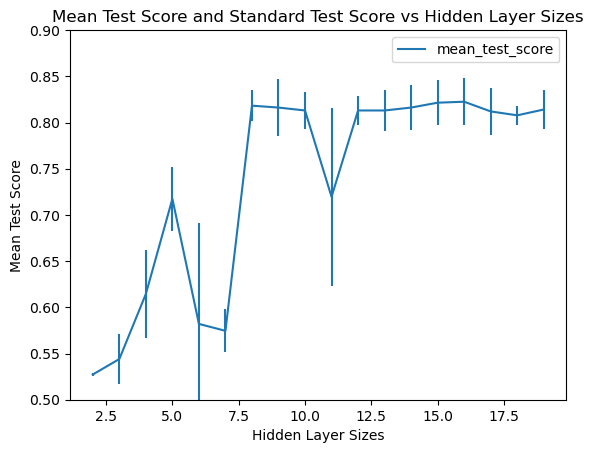

In [27]:
# Convert 'param_hidden_layer_sizes' column to numeric

gridSearch_results = pd.DataFrame(gridSearch.cv_results_)
gridSearch_results['param_hidden_layer_sizes'] = pd.to_numeric(gridSearch_results['param_hidden_layer_sizes'])

# Plot mean_test_score and std_test_score

ax = gridSearch_results.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ylim=(0.5, 0.9))
ax.set_xlabel('Hidden Layer Sizes')
ax.set_ylabel('Mean Test Score')
plt.title('Mean Test Score and Standard Test Score vs Hidden Layer Sizes')
plt.show()

In [28]:
# Make classification for new heart statistics data using neural network model

# Develop data frame with 2 new records without 'target' outcome variable

new_data = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],         
})

# Make classifications for new data

Heart_pred_new = Heart_clf_imp.predict(new_data)

# Predictions with probabilities p(0) and p(1)

Heart_prob_new = np.round(Heart_clf_imp.predict_proba(new_data), decimals=4)

# Make classifications for new data from patients

pred_Heart_result_new = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],
            'p(0)': [p[0] for p in Heart_prob_new],
            'p(1)': [p[1] for p in Heart_prob_new],
            'Classification': Heart_pred_new
})

print()
print('Classification for target (CVD Status)')
print(pred_Heart_result_new)


Classification for target (CVD Status)
   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   45    0                3           110          280                    0   
1   35    1                4           135          190                    1   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope    p(0)  \
0            1             160                0        1         1  0.9565   
1            0             115                1        0         2  0.0685   

     p(1)  Classification  
0  0.0435               0  
1  0.9315               1  


# Accuracy Comparison for Each Model

In [29]:
# Confusion Matrix for Classification Tree (Training and Validation Partitions)

print('Confusion Matrix for Classification Tree Model (Training and Validation Partitions)')
print()

# Identify and display confusion matrix for training partition

print('Training Partition')
print()
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition

print()
print('Validation Partition')
print()
classificationSummary(valid_y, bestClassTree.predict(valid_X))
print()
print('_______________________________________________________________________________')

# Confusion Matrix for Logistic Regression (Training and Validation Partitions)

print()
print('Confusion Matrix for Logistic Regression Model (Training and Validation Partitions)')
print()

# Identify and display confusion matrix for training partition

print('Training Partition')
print()
classificationSummary(train_y, logit_nom.predict(train_X))

# Identify and display confusion matrix for validation partition

print()
print('Validation Partition')
print()
classificationSummary(valid_y, logit_nom.predict(valid_X))
print()
print('_______________________________________________________________________________')

# Confusion Matrix for Neural Network (Training and Validation Partitions)

print()
print('Confusion Matrix for Neural Network Model (Training and Validation Partitions)')
print()

# Identify and display confusion matrix for training partition

print('Training Partition')
print()
classificationSummary(train_y, Heart_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation partition

print()
print('Validation Partition')
print()
classificationSummary(valid_y, Heart_clf_imp.predict(valid_X))

Confusion Matrix for Classification Tree Model (Training and Validation Partitions)

Training Partition

Confusion Matrix (Accuracy 0.9443)

       Prediction
Actual   0   1
     0 421  29
     1  24 478

Validation Partition

Confusion Matrix (Accuracy 0.8824)

       Prediction
Actual   0   1
     0 103   8
     1  20 107

_______________________________________________________________________________

Confusion Matrix for Logistic Regression Model (Training and Validation Partitions)

Training Partition

Confusion Matrix (Accuracy 0.8298)

       Prediction
Actual   0   1
     0 370  80
     1  82 420

Validation Partition

Confusion Matrix (Accuracy 0.8529)

       Prediction
Actual   0   1
     0  96  15
     1  20 107

_______________________________________________________________________________

Confusion Matrix for Neural Network Model (Training and Validation Partitions)

Training Partition

Confusion Matrix (Accuracy 0.8519)

       Prediction
Actual   0   1
     0 354  96


# Classifications for Each Model (classifications labelled & color coded)

In [30]:
# For Classification Tree Model

print('Classification Output for Classification Tree Model')

# Make classification for new heart statistics data using smaller classfication tree model

# Develop data frame with 2 new records without 'target' outcome variable
 
new_data_small = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],
})

# Make classifications for new data

pred_small_tree = bestClassTree.predict(new_data_small)

# Make classifications for new data from patients

pred_small_result = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],
            'Classification': pred_small_tree,
})

print()
print('Classifications for target (CVD Status)')
#print(pred_small_result)
print()

# Create a dictionary to map numeric classes to their respective labels

class_labels_CT = {0: '\033[1;92mCVD Absent\033[0m', 1: '\033[1;91mCVD Present\033[0m'}

# Replace numeric classes with their respective labels in the 'Classification' column

pred_small_result['Classification'] = pred_small_result['Classification'].map(class_labels_CT)

# Display the updated data frame with class labels

print(pred_small_result)

print('______________________________________________________________________________')

print()

#For Logistic Regression

print('Classification Output for Logistic Regression Model')

# Make classification for new heart statistics data using multiple predictor logistic regression model

# Develop data frame with 2 new records without 'target' outcome variable

new_data = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2], 
})

# Make classifications for new data

pred_new_data = logit_nom.predict(new_data)

# Predictions with probabilities p(0) and p(1)

pred_new_prob = np.round(logit_nom.predict_proba(new_data), decimals = 4)

# Make classifications for new data from patients

pred_new_result = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2], 
            'p(0)': [p[0] for p in pred_new_prob],
            'p(1)': [p[1] for p in pred_new_prob],
            'Classification': pred_new_data,
})

print()
print('Classifications for target (CVD Status)')
print()

# Create a dictionary to map numeric classes to their respective labels

class_labels_LR = {0: '\033[1;92mCVD Absent\033[0m', 1: '\033[1;91mCVD Present\033[0m'}

# Replace numeric classes with their respective labels in the 'Classification' column

pred_new_result['Classification'] = pred_new_result['Classification'].map(class_labels_LR)

# Display the updated data frame with class labels

print(pred_new_result)

print('______________________________________________________________________________')

print()

#For Neural Network

print('Classification Output for Neural Network Model')
print()

# Make classification for new heart statistics data using neural network model

# Develop data frame with 2 new records without 'target' outcome variable

new_data = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],         
})

# Make classifications for new data

Heart_pred_new = Heart_clf_imp.predict(new_data)

# Predictions with probabilities p(0) and p(1)

Heart_prob_new = np.round(Heart_clf_imp.predict_proba(new_data), decimals=4)

# Make classifications for new data from patients

pred_Heart_result_new = pd.DataFrame({
            'age': [45,35],  
            'sex': [0,1],
            'chest_pain_type': [3, 4],
            'resting_bp_s': [110, 135],  
            'cholesterol': [280, 190],
            'fasting_blood_sugar': [0, 1],
            'resting_ecg': [1, 0],
            'max_heart_rate': [160, 115],  
            'exercise_angina': [0, 1],  
            'oldpeak': [1, 0],  
            'ST_slope': [1, 2],
            'p(0)': [p[0] for p in Heart_prob_new],
            'p(1)': [p[1] for p in Heart_prob_new],
            'Classification': Heart_pred_new
})

print('Classification for target (CVD Status)')
print()

# Create a dictionary to map numeric classes to their respective labels

class_labels_NN = {0: '\033[1;92mCVD Absent\033[0m', 1: '\033[1;91mCVD Present\033[0m'}

# Replace numeric classes with their respective labels in the 'Classification' column

pred_Heart_result_new['Classification'] = pred_Heart_result_new['Classification'].map(class_labels_NN)

# Display the updated data frame with class labels

print(pred_Heart_result_new)

Classification Output for Classification Tree Model

Classifications for target (CVD Status)

   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   45    0                3           110          280                    0   
1   35    1                4           135          190                    1   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  \
0            1             160                0        1         1   
1            0             115                1        0         2   

           Classification  
0   CVD Absent  
1  CVD Present  
______________________________________________________________________________

Classification Output for Logistic Regression Model

Classifications for target (CVD Status)

   age  sex  chest_pain_type  resting_bp_s  cholesterol  fasting_blood_sugar  \
0   45    0                3           110          280                    0   
1   35    1                4           135          190   